## <center>Capstone Project 1 Ad AB Testing
### <center>Sri Das

#### Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#### Loading the data

In [2]:
data = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')

#### Gathering the basic information of the data

In [3]:
data.shape

(8077, 9)

In [4]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### Data cleaning/wrangling

#### Checking for null values

In [6]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

Data seems clean as there are no missing values, hence imputation techniques are not needed to fill them. Most of the data is categorical type hence move to the next step of exploring the data

### EDA - exploring the data

As most of the data is categorical type and even the integer type data for 'yes' and 'no' is not numerical in nature. Further exploring the data by looking at the categorical features

In [7]:
data.describe(include = 'object')

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,269,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [8]:
data.groupby('experiment').count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,4071,4071,4071,4071,4071,4071,4071,4071
exposed,4006,4006,4006,4006,4006,4006,4006,4006


From the above two observations it can be deduced that the experiment was split almost equally between 'control' and 'exposed' groups. And the experiment is carried over a period of 8 days. We can also see that 'auction_id' has unique entries and there are no duplicates.    

#### Checking to see how many users among all the participants responded to the ads, in both the groups 

In [9]:
data.groupby('experiment').yes.value_counts()

experiment  yes
control     0      3807
            1       264
exposed     0      3698
            1       308
Name: yes, dtype: int64

In [10]:
data.groupby('experiment').no.value_counts()

experiment  no
control     0     3749
            1      322
exposed     0     3657
            1      349
Name: no, dtype: int64

From the above results it can be seen that a majority of the users did not respond to the ad. The next step is to filter the data only for the users that responded to the ad

In [11]:
data['filter'] = data['yes'] + data['no']
data = data[data['filter'] == 1]
data.shape

(1243, 10)

In [12]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,filter
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1


Adding another column to the dataframe called 'converted' which will be '1' for all those who clicked the ad or 'yes' and '0' for those who clicked 'no'

In [13]:
data['converted'] = data['yes'] * data['filter']
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,filter,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1,0


In [14]:
rel_data = data.drop(columns=['yes', 'no', 'filter'], axis=1)
rel_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


In [15]:
rel_data.shape

(1243, 8)

Further exploring the data to check how factors such as date, hour, platform and browser affect conversion

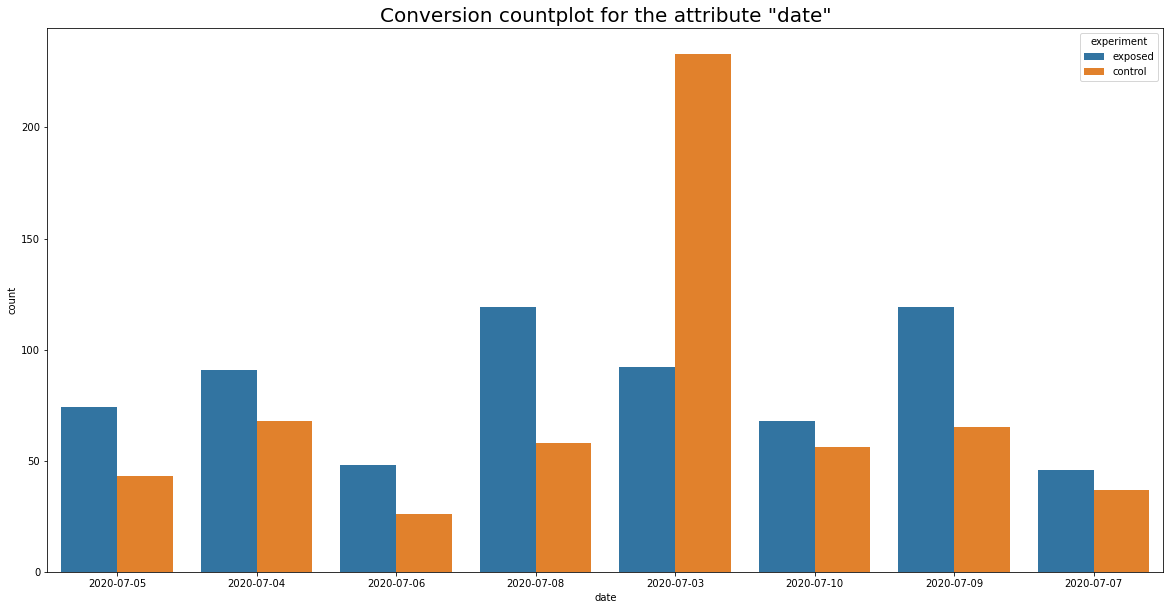

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'date',
            hue = 'experiment',
            data = rel_data)
plt.title('Conversion countplot for the attribute "date"', fontsize=20);

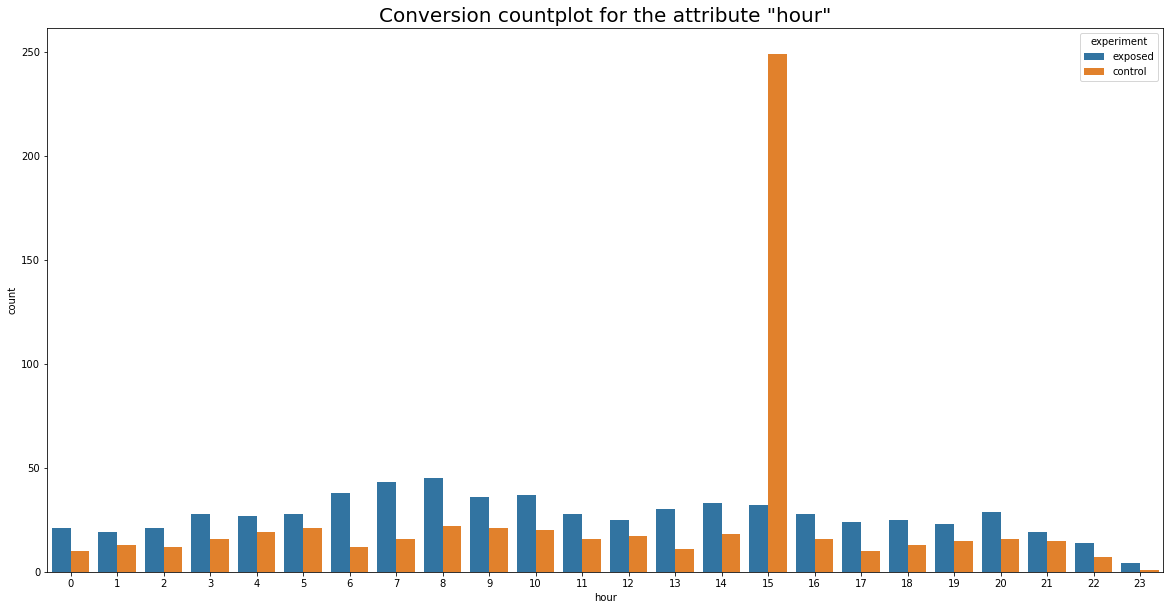

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'hour',
            hue = 'experiment',
            data = rel_data)
plt.title('Conversion countplot for the attribute "hour"', fontsize=20);

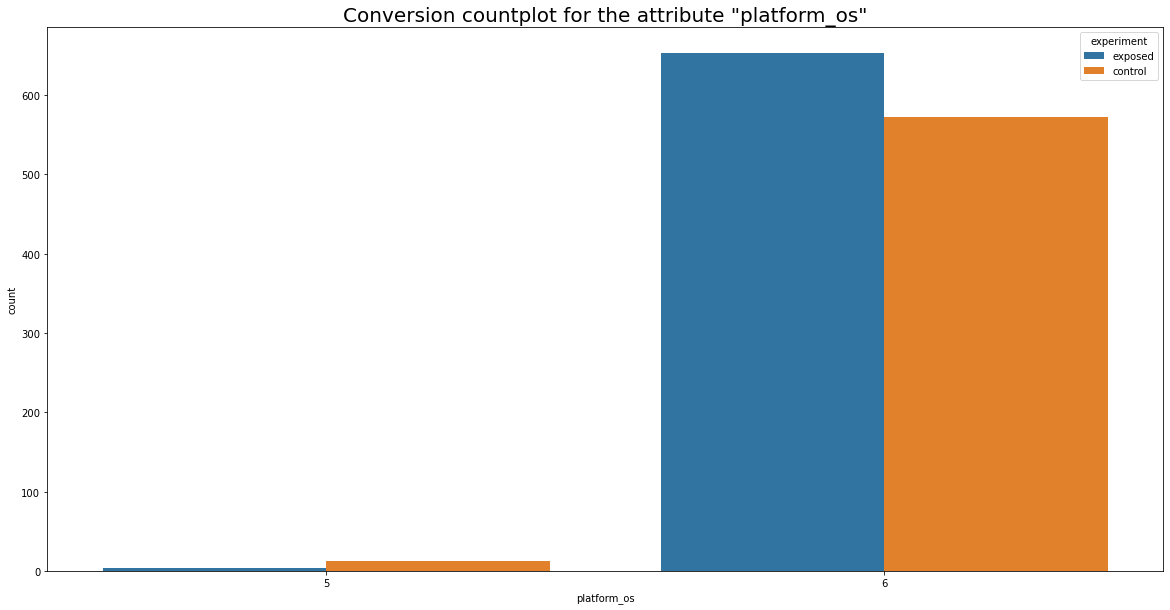

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'platform_os',
            hue = 'experiment',
            data = rel_data)
plt.title('Conversion countplot for the attribute "platform_os"', fontsize=20);

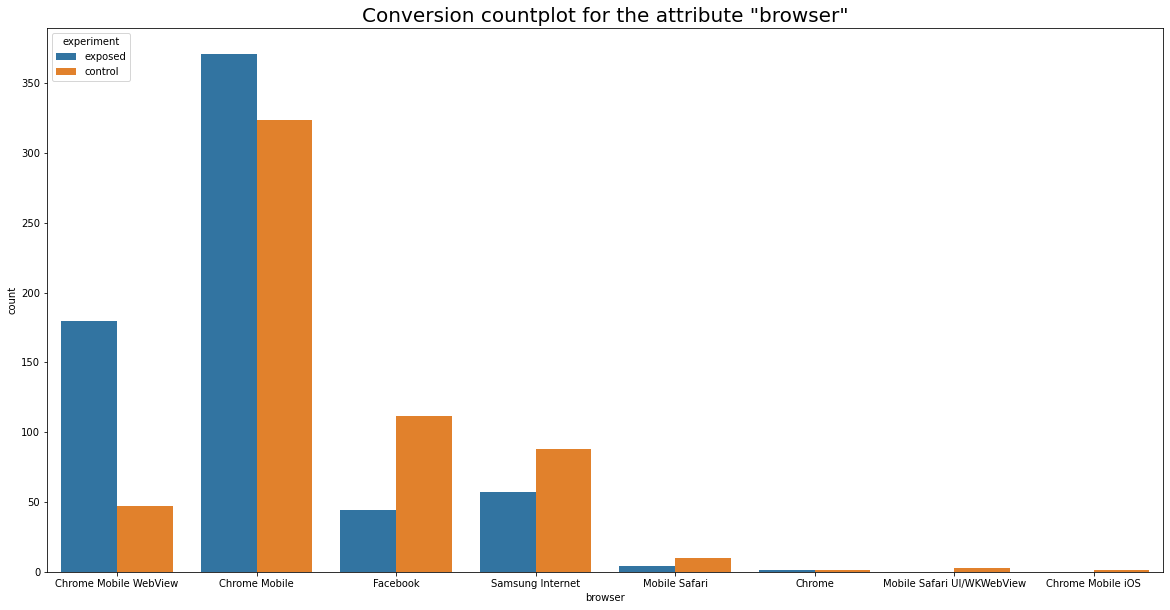

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'browser',
            hue = 'experiment',
            data = rel_data)
plt.title('Conversion countplot for the attribute "browser"', fontsize=20);

Looking at conversion figures for the two groups

In [20]:
conversion_rates = rel_data.groupby('experiment')['converted']

st_dev = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
std_err = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, st_dev, std_err])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.451,0.498,0.021
exposed,0.469,0.499,0.019


From the above results it can be seen that both ads have very similar performance. The new ad (exposed) group has slightly higher conversion rate compared to the control group. Visualizing the same below 

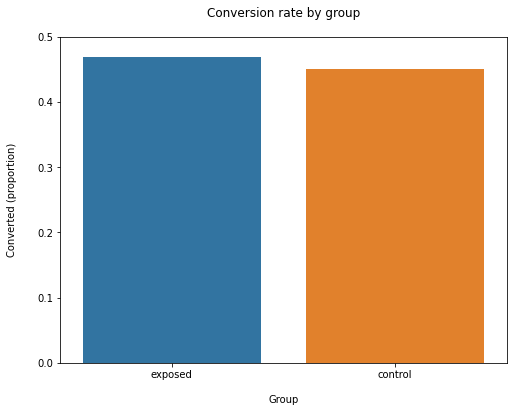

In [21]:
plt.figure(figsize=(8,6))

sns.barplot(x=rel_data['experiment'], y=rel_data['converted'], ci=False)

plt.ylim(0, 0.5)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=20);

#### EDA Conclusions

1. The 'hour' and 'date' attributes have high counts for the control group. For other attributes both control and exposed counts are comparable. This may be because of when the ad was implemented. 
2. The conversion rate of both the ads are very similar with exposed group having 1.83pp more

This data shows that both ads performed similarly and there was no advantage with the new ad. Let's check if this is true statistically.

### Statistical Significance

First formulate the null hypothesis(the hypothesis we are trying to disprove.

**Null Hypothesis**: There is no significance difference between the conversion rate in the two groups

**Alternate Hypothesis**: There is significance difference between the conversion rate in the two groups

**Confidence level** : 95% (alpha=0.05)

In [22]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [23]:
# Filtering the data to seperate the conversions of each group
control_results = rel_data[rel_data['experiment'] == 'control']['converted']
exposed_results = rel_data[rel_data['experiment'] == 'exposed']['converted']

# counting the conversions of each group
n_con = control_results.count()
n_exp = exposed_results.count()

# Successes of each group
successes = [control_results.sum(), exposed_results.sum()]

# Observations of each group
nobs = [n_con, n_exp]

# Computing the z-score and p-value 
z_stat, pval = proportions_ztest(successes, nobs=nobs)

# Computing the confidence intervals
(lwr_con, lwr_exp), (upr_con, upr_exp) = proportion_confint(successes, nobs=nobs, alpha=0.05)

# Printing the results
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lwr_con:.3f}, {upr_con:.3f}]')
print(f'ci 95% for exposed group: [{lwr_exp:.3f}, {upr_exp:.3f}]')

z statistic: -0.65
p-value: 0.518
ci 95% for control group: [0.410, 0.491]
ci 95% for exposed group: [0.431, 0.507]


### Conclusions

- The p-value calculated is 0.5185, which is much higher than α (α =0.05). Hence we can not reject the 'Null Hypothesis' whcih states that there is no significant statistical difference of ad success between the two groups.

- This conculdes that the new creative ad failed to generate more responses to fill the quetionnaire over the dummy ad. We cannot attribute the marginal increase (1.83pp) in the conversion rate of the exposed group to any factor. 

-  From the 95% CI [0.431, 0.507] of the exposed group we can see that on the best day, the new ad will have 50% success. This is almost similar to the dummy ad [0.410, 0.491] and there is no advantage with the new ad. Hence it makes no business sense to implement the new ad

- However this experiment has been insightful, the fact that only 1243 users out of 8077 engaged with the ads (yes = 1 or no=1) shows that may be other steps can be used to improve the engagement. The features 'date', 'hour' and 'browser' can be useful in determining when and how to release the next ad. With this information the reach and engagement of the subsequent adds can be improved.